### 보스턴 주택 가격 데이터 셋

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 한글처리
plt.rcParams['font.family'] = 'Malgun Gothic'
# 음수처리
plt.rcParams['axes.unicode_minus'] = False


import warnings
warnings.filterwarnings('ignore')

### 데이터 셋 로드

#### 1978 보스턴 주택 가격(506개 타운의 주택 가격 중앙값 - 단위:1000달러)

In [4]:
from sklearn.datasets import load_boston

boston = load_boston()

In [5]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [8]:
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [9]:
boston_df['PRICE'] = boston.target

In [10]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


```
X (독립변수)

CRIM     지역별 범죄 발생율
ZN       25,000 평방 피트를 초과하는 거주 지역의 비율
INDUS    비 소매상업 지역 면적 비율
CHAS     찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
NOX      일산화질소 농도
RM       거주할 수 있는 방 개수
AGE      1940년 이전에 건축된 소유 주택의 비율
DIS      5개 주요 고용센터까지의 가중 거리
RAD      고속도로 접근 용이도
TAX      10,000 달러당 재산세율
PTRATIO  지역의 교사와 학생 수 비율
B        지역의 흑인 비율
LSTAT    하위 계층의 비율


y (종속변수)

PRICE    본인 소유의 주택 가격(중앙값)
```

In [12]:
boston_df.shape

(506, 14)

In [13]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### 독립변수가 종속변수에 미치는 영향 시각화

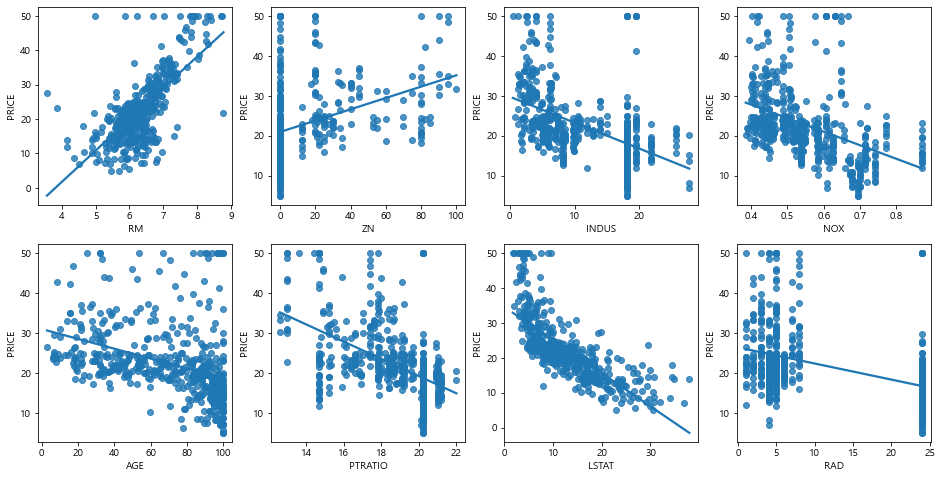

In [15]:
fig, axes = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ["RM","ZN","INDUS","NOX","AGE","PTRATIO","LSTAT","RAD"]

for i, feature in enumerate(lm_features):
    row = int(i / 4)
    col = i % 4
    sns.regplot(x=feature, y="PRICE", data=boston_df, ci=None, ax=axes[row][col])

In [16]:
# 통계분석 시 사용하는 api

import statsmodels.api as sm

### 단순선형회귀
- 독립변수 1개, 종속변수 1 개

In [17]:
# 종속변수
target = boston_df[['PRICE']]

# 독립변수
crim = boston_df[['CRIM']]
rm = boston_df[['RM']]
lstat = boston_df[['LSTAT']]

### 1) crim 이 price에 미치는 영향

In [18]:
# 상수항 추가 : 회귀분석모형 수식을 간단하게 하기 위해 사용

crim1 = sm.add_constant(crim, has_constant="add")
crim1

,const,CRIM
0,1.0,0.00632
1,1.0,0.02731
2,1.0,0.02729
3,1.0,0.03237
4,1.0,0.06905
...,...,...
501,1.0,0.06263
502,1.0,0.04527
503,1.0,0.06076
504,1.0,0.10959


In [19]:
# 회귀모델 : OLS(Ordinary Least Squares)


crim_model = sm.OLS(target, crim1)
fitted_crim_model = crim_model.fit()

In [20]:
fitted_crim_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Tue, 16 Aug 2022   Prob (F-statistic):           1.17e-19
Time:                        14:48:09   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.000      23.229      24.837
CRIM          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# 회귀계수만 출력

fitted_crim_model.params

const    24.033106
CRIM     -0.415190
dtype: float64

In [22]:
# 예측

y_pred = fitted_crim_model.predict(crim1)

In [23]:
y_pred

0      24.030482
1      24.021767
2      24.021776
3      24.019666
4      24.004437
         ...    
501    24.007103
502    24.014311
503    24.007879
504    23.987605
505    24.013422
Length: 506, dtype: float64

In [24]:
target

,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


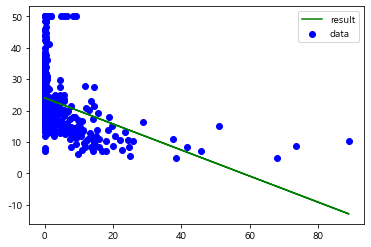

In [25]:
# 실제 데이터
plt.scatter(crim,target,color='blue', label="data")
# 추세선(최소제곱화)
plt.plot(crim, y_pred, label="result", color='green')
plt.legend()
plt.show()

### 2) rm 이 price에 미치는 영향

In [26]:
rm1 = sm.add_constant(rm, has_constant="add")


rm_model = sm.OLS(target, rm1)
fitted_rm_model = rm_model.fit()

In [28]:
fitted_rm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 16 Aug 2022   Prob (F-statistic):           2.49e-74
Time:                        15:02:49   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
fitted_rm_model.params

const   -34.670621
RM        9.102109
dtype: float64

In [30]:
rm_y_pred = fitted_rm_model.predict(rm1)
rm_y_pred

0      25.175746
1      23.774021
2      30.728032
3      29.025938
4      30.382152
         ...    
501    25.339584
502    21.034286
503    28.825691
504    27.169108
505    20.215096
Length: 506, dtype: float64

In [31]:
target

,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


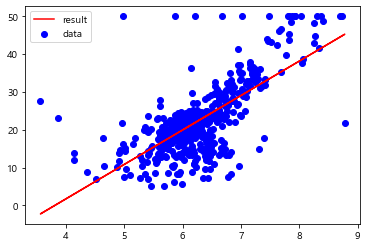

In [32]:
# 실제 데이터
plt.scatter(rm,target,color='blue', label="data")
# 추세선(최소제곱화)
plt.plot(rm, rm_y_pred, label="result", color='red')
plt.legend()
plt.show()

In [33]:
lstat1 = sm.add_constant(lstat, has_constant="add")


lstat_model = sm.OLS(target, lstat1)
fitted_lstat_model = lstat_model.fit()

In [34]:
fitted_lstat_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 16 Aug 2022   Prob (F-statistic):           5.08e-88
Time:                        15:12:16   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
lstat_y_pred = fitted_lstat_model.predict(lstat1)

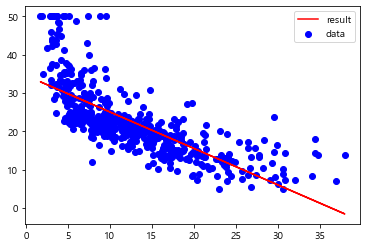

In [39]:
# 실제 데이터
plt.scatter(lstat,target,color='blue', label="data")
# 추세선(최소제곱화)
plt.plot(lstat, lstat_y_pred, label="result", color='red')
plt.legend()
plt.show()

### 잔차(실제값 - 예측값)

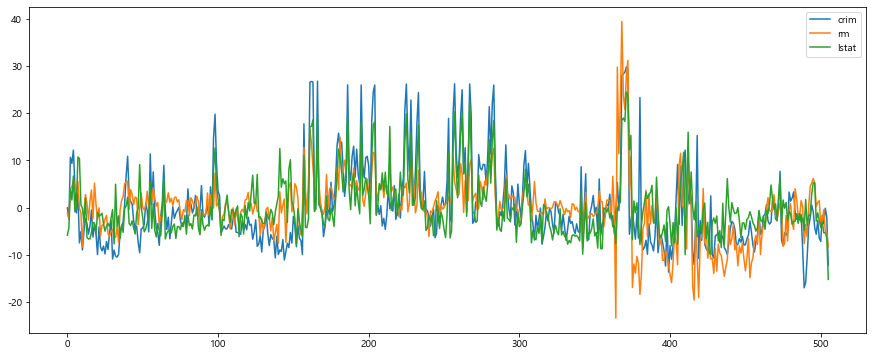

In [42]:
plt.figure(figsize=(15,6))
fitted_crim_model.resid.plot(label="crim")
fitted_rm_model.resid.plot(label="rm")
fitted_lstat_model.resid.plot(label="lstat")
plt.legend()
plt.show()

## scikit - Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
# 독립변수와 종속변수 분리

# boston_df.head()

X = pd.DataFrame(boston_df.iloc[:,0])
y = boston_df[['PRICE']]

In [51]:
X

,CRIM
0,0.00632
1,0.02731
2,0.02729
3,0.03237
4,0.06905
...,...
501,0.06263
502,0.04527
503,0.06076
504,0.10959


In [52]:
y

,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [53]:
# 모델 생성

lr = LinearRegression() # sm.OLS()
lr.fit(X,y)  # 회귀계수(coef_, intercept_)

LinearRegression()

In [54]:
# 예측

y_pred = lr.predict(X)

In [55]:
# 회귀계수 확인

print('절편 : ',lr.intercept_)
print('기울기 : ',lr.coef_)

절편 :  [24.03310617]
기울기 :  [[-0.41519028]]


In [57]:
# 평가

print('crim R2_score : {:.3f}'.format(r2_score(y, y_pred)))

crim R2_score : 0.151
